In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Cars24\Desktop\ML-DL-NLP\ML\Binary Classification with a Tabular Kidney Stone Prediction\Data_Folder\train.csv")

In [4]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


physical chemistry. 
Osmolarity is proportional to the concentration of
molecules in solution; 
(4) conductivity (mMho milliMho). One Mho is one
reciprocal Ohm. 
Conductivity is proportional to the concentration of charged
ions in solution; 
(5) urea concentration in millimoles per litre; 
and (6) calcium concentration (CALC) in millimolesllitre.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [6]:
df.shape

(414, 8)

In [7]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [8]:
df['target'].value_counts()

target
0    230
1    184
Name: count, dtype: int64

In [9]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [10]:
df_plot = df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]

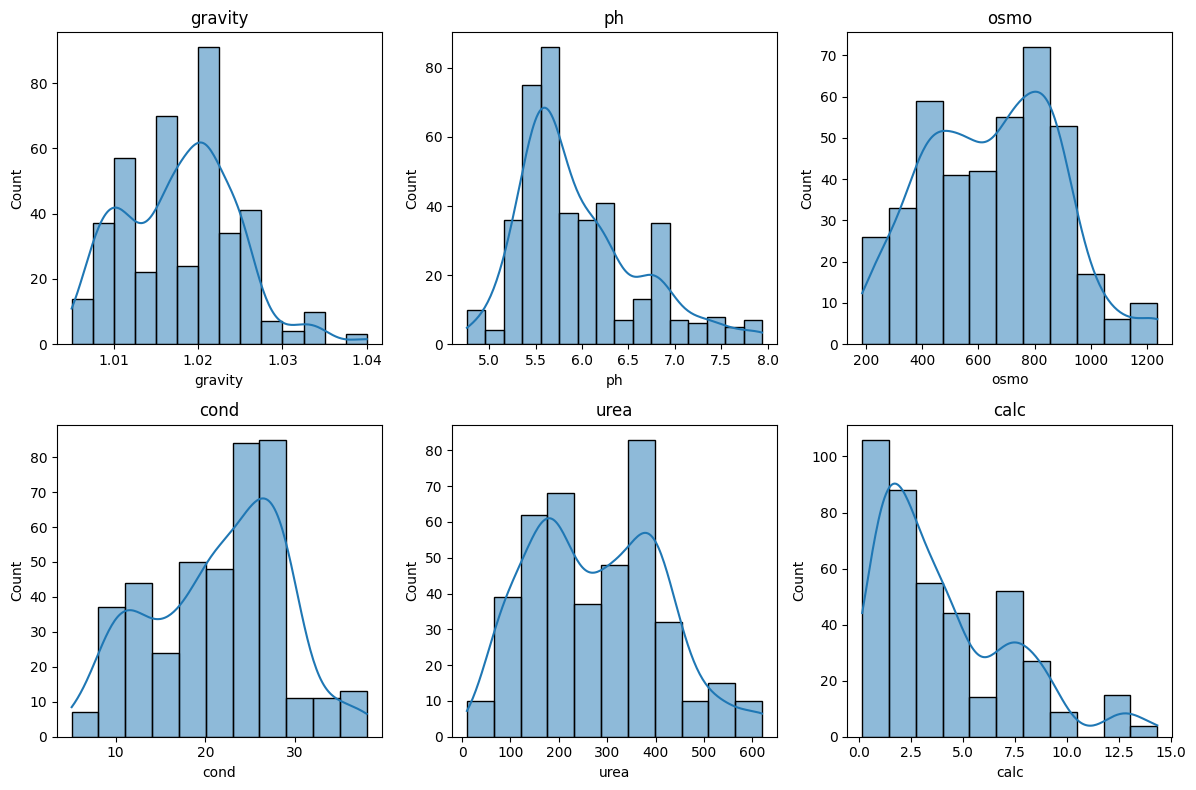

In [11]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8)) 
ax = ax.flatten()
for i,col in enumerate(df_plot.columns):
    sns.histplot(df_plot[col],ax=ax[i],kde=True)
    ax[i].set_title(col) 
plt.tight_layout()


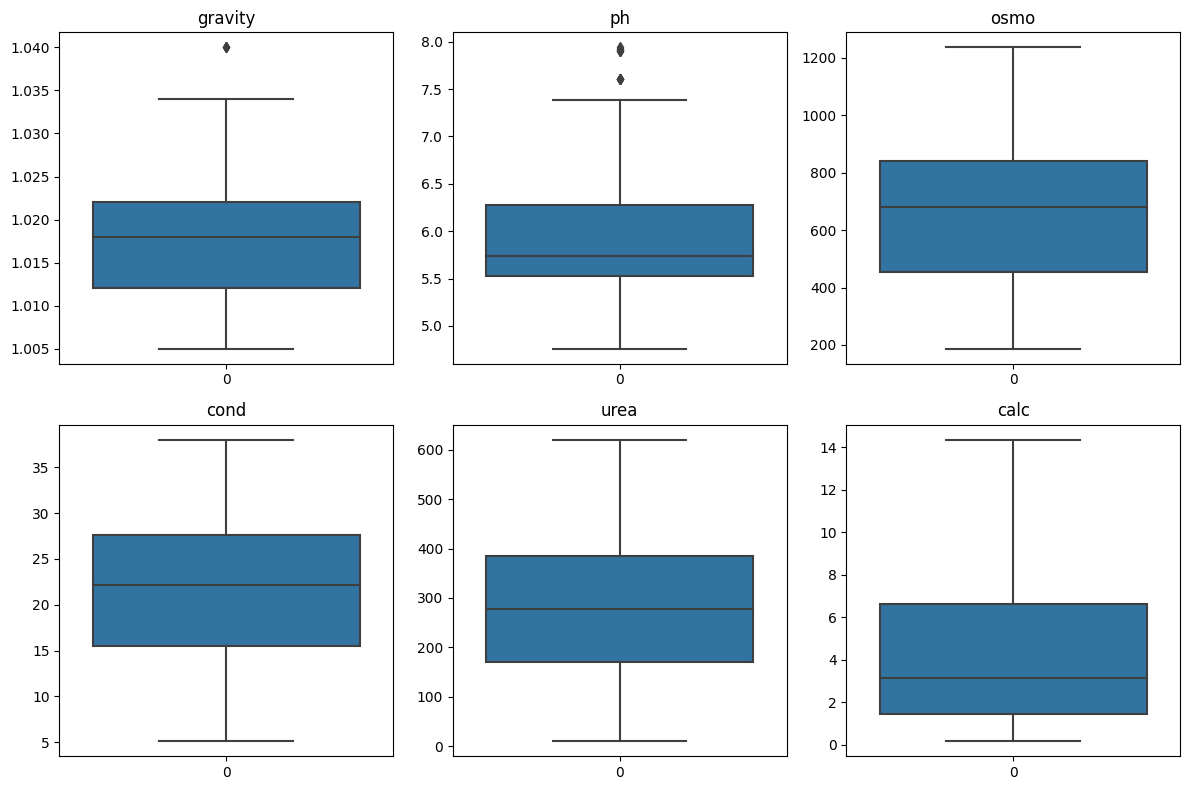

In [12]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8)) 
ax = ax.flatten()
for i,col in enumerate(df_plot.columns):
    sns.boxplot(df_plot[col],ax=ax[i])
    ax[i].set_title(col) 
plt.tight_layout()


In [13]:
def cap_outliear(df_plot):
    df_capped = df_plot.copy()
    for col in df_capped:
        q1 = df_capped[col].quantile(0.25)
        q3 = df_capped[col].quantile(0.75)
        iqr = q3-q1 
        upper_bound = q3+1.5*iqr
        lower_bound = q1-1.5*iqr 
        df_capped[col] = df_capped[col].clip(lower = lower_bound,upper=upper_bound)
    return df_capped

In [14]:
df_plot = cap_outliear(df_plot)

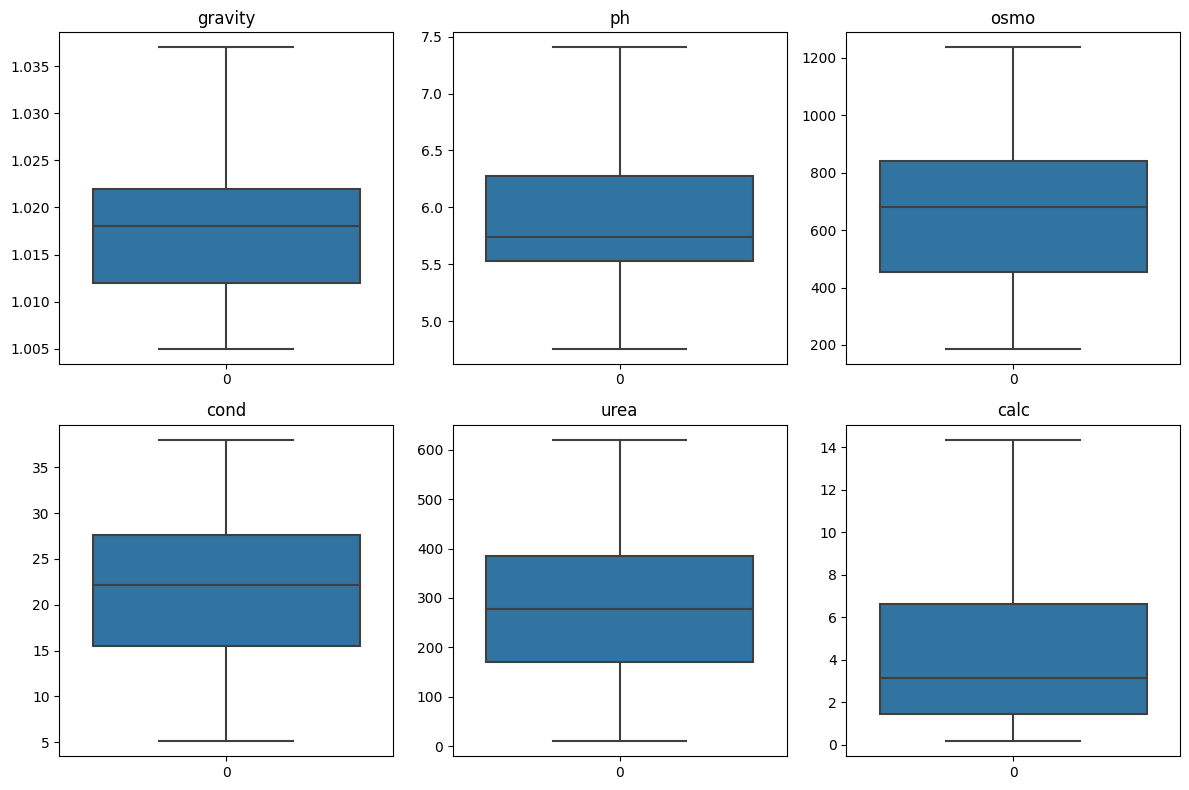

In [15]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8)) 
ax = ax.flatten()
for i,col in enumerate(df_plot.columns):
    sns.boxplot(df_plot[col],ax=ax[i])
    ax[i].set_title(col) 
plt.tight_layout()

In [16]:
X = df_plot 
y = df['target']

In [17]:
X.shape,y.shape

((414, 6), (414,))

In [18]:
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
scale = RobustScaler()
x_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)
x_scaled

array([[-0.66666667,  0.05333333, -0.60677083, -0.51452282, -0.42028986,
        -0.41112455],
       [-0.11111111, -0.02666667,  0.02604167,  0.0746888 , -0.05797101,
         0.08706167],
       [ 0.77777778,  1.56      ,  0.65885417,  0.39834025,  0.54589372,
        -0.11124547],
       ...,
       [-0.33333333, -0.50666667, -0.3515625 , -1.28630705,  0.09178744,
         0.21281741],
       [ 0.77777778, -0.06666667,  0.41666667,  0.44813278,  0.49758454,
         0.21281741],
       [ 1.11111111,  1.37333333, -0.1640625 , -1.02904564,  0.6763285 ,
        -0.22974607]])

In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [22]:
lr = LogisticRegression()
lr.fit(x_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
accuracy_score(y_test, y_pred_lr)

0.7831325301204819

In [36]:
decisionTree = DecisionTreeClassifier(min_samples_leaf=2)
randomForest = RandomForestClassifier()
gradiantBoost = GradientBoostingClassifier()
supportVector = SVC()
xgb = XGBClassifier()
models = [decisionTree,randomForest,gradiantBoost, supportVector,xgb]

In [37]:
def model_preds(models,x_train,y_train,x_test,y_test):
    for model in models:
        model.fit(x_train,y_train)
        pred = model.predict(x_test) 
        accuracy = accuracy_score(y_test,pred)
        print(f'Acurracy of {model} is {accuracy}')
        print(confusion_matrix(y_test,pred))
    return
        
    

In [38]:
model_preds(models,x_scaled,y_train,x_test_scaled,y_test)

Acurracy of DecisionTreeClassifier(min_samples_leaf=2) is 0.6626506024096386
[[34 11]
 [17 21]]
Acurracy of RandomForestClassifier() is 0.7349397590361446
[[35 10]
 [12 26]]
Acurracy of GradientBoostingClassifier() is 0.7951807228915663
[[36  9]
 [ 8 30]]
Acurracy of SVC() is 0.7951807228915663
[[39  6]
 [11 27]]
Acurracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimat

In [31]:
def svc_hyperparameter_tuning(model,x_scaled,y_train,x_test_scaled,y_test):
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001]}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(x_scaled, y_train)
    y_pred = grid_search.predict(x_test_scaled)
    print("Best parameters found:")
    print(grid_search.best_params_)
    print("Best score:")
    print(grid_search.best_score_)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Acurracy of {model} is {accuracy}')
    return confusion_matrix(y_test, y_pred)
    

In [32]:
svc_hyperparameter_tuning(supportVector,x_scaled,y_train,x_test_scaled,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:
0.7459068294889188
Acurracy of SVC() is 0.7831325301204819


array([[38,  7],
       [11, 27]], dtype=int64)